In [2]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [16]:
df = pd.read_csv("data/cleaned_test.csv")

In [17]:
df.head()

,Unnamed: 0,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmalized
0,0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"['The', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"['The', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['the', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['the', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['president', 'yet', 'clarify', 'victory', 'pandemic', 'looks', 'like', 'president', 'joe', 'bid...","[('president', 'NN'), ('yet', 'RB'), ('clarify', 'JJ'), ('victory', 'NN'), ('pandemic', 'JJ'), (...","[('president', 'n'), ('yet', 'r'), ('clarify', 'a'), ('victory', 'n'), ('pandemic', 'a'), ('look...","['president', 'yet', 'clarify', 'victory', 'pandemic', 'look', 'like', 'president', 'joe', 'bide..."
1,1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"['To', 'hear', 'President', 'Joe', 'Biden', 'tell', 'it,', 'the', 'American', 'evacuation', 'fro...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","['To', 'hear', 'President', 'Joe', 'Biden', 'tell', 'it', ',', 'the', 'American', 'evacuation', ...","['to', 'hear', 'president', 'joe', 'biden', 'tell', 'it', ',', 'the', 'american', 'evacuation', ...","['to', 'hear', 'president', 'joe', 'biden', 'tell', 'it', 'the', 'american', 'evacuation', 'from...","['hear', 'president', 'joe', 'biden', 'tell', 'american', 'evacuation', 'afghanistan', 'parallel...","[('hear', 'JJ'), ('president', 'NN'), ('joe', 'NNS'), ('biden', 'VBP'), ('tell', 'VB'), ('americ...","[('hear', 'a'), ('president', 'n'), ('joe', 'n'), ('biden', 'v'), ('tell', 'v'), ('american', 'a...","['hear', 'president', 'joe', 'biden', 'tell', 'american', 'evacuation', 'afghanistan', 'parallel..."
2,2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"['The', 'mainstream', ""media's"", 'honeymoon', 'with', 'President', 'Joe', 'Biden', 'is', 'over.'...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"['The', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'President', 'Joe', 'Biden', 'is', 'ov...","['the', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'president', 'joe', 'biden', 'is', 'ov...","['the', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'president', 'joe', 'biden', 'is', 'ov...","['mainstream', 'media', ""'s"", 'honeymoon', 'president', 'joe', 'biden', 'yet', 'media', 'coverag...","[('mainstream', 'JJ'), ('media', 'NNS'), (""'s"", 'POS'), ('honeymoon', 'NN'), ('president', 'NN')...","[('mainstream', 'a'), ('media', 'n'), (""'s"", 'n'), ('honeymoon', 'n'), ('president', 'n'), ('joe...","['mainstream', 'medium', ""'s"", 'honeymoon', 'president', 'joe', 'biden', 'yet', 'medium', 'cover..."
3,3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"['The', '""Squad""', 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a', 'military...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","['The', '``', 'Squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['the', '``', 'squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['the', '``', 'squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['``', 'squad', ""''"", 'makes', 'demand', 'military', 'solution', 'better', 'part', 'decade', 'wa...","[('``', '``'), ('squad', 'NN'), (""''"", "

In [18]:
df.rename(columns={"lemmalized":"lemmatized"},inplace=True)

In [19]:
df.to_csv("data/cleaned_test.csv", index=False)

In [8]:
df.head()

,Unnamed: 0,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"['The', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"['The', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['the', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['the', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['president', 'yet', 'clarify', 'victory', 'pandemic', 'looks', 'like', 'president', 'joe', 'bid...","[('president', 'NN'), ('yet', 'RB'), ('clarify', 'JJ'), ('victory', 'NN'), ('pandemic', 'JJ'), (...","[('president', 'n'), ('yet', 'r'), ('clarify', 'a'), ('victory', 'n'), ('pandemic', 'a'), ('look...","['president', 'yet', 'clarify', 'victory', 'pandemic', 'look', 'like', 'president', 'joe', 'bide..."
1,1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"['To', 'hear', 'President', 'Joe', 'Biden', 'tell', 'it,', 'the', 'American', 'evacuation', 'fro...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","['To', 'hear', 'President', 'Joe', 'Biden', 'tell', 'it', ',', 'the', 'American', 'evacuation', ...","['to', 'hear', 'president', 'joe', 'biden', 'tell', 'it', ',', 'the', 'american', 'evacuation', ...","['to', 'hear', 'president', 'joe', 'biden', 'tell', 'it', 'the', 'american', 'evacuation', 'from...","['hear', 'president', 'joe', 'biden', 'tell', 'american', 'evacuation', 'afghanistan', 'parallel...","[('hear', 'JJ'), ('president', 'NN'), ('joe', 'NNS'), ('biden', 'VBP'), ('tell', 'VB'), ('americ...","[('hear', 'a'), ('president', 'n'), ('joe', 'n'), ('biden', 'v'), ('tell', 'v'), ('american', 'a...","['hear', 'president', 'joe', 'biden', 'tell', 'american', 'evacuation', 'afghanistan', 'parallel..."
2,2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"['The', 'mainstream', ""media's"", 'honeymoon', 'with', 'President', 'Joe', 'Biden', 'is', 'over.'...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"['The', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'President', 'Joe', 'Biden', 'is', 'ov...","['the', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'president', 'joe', 'biden', 'is', 'ov...","['the', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'president', 'joe', 'biden', 'is', 'ov...","['mainstream', 'media', ""'s"", 'honeymoon', 'president', 'joe', 'biden', 'yet', 'media', 'coverag...","[('mainstream', 'JJ'), ('media', 'NNS'), (""'s"", 'POS'), ('honeymoon', 'NN'), ('president', 'NN')...","[('mainstream', 'a'), ('media', 'n'), (""'s"", 'n'), ('honeymoon', 'n'), ('president', 'n'), ('joe...","['mainstream', 'medium', ""'s"", 'honeymoon', 'president', 'joe', 'biden', 'yet', 'medium', 'cover..."
3,3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"['The', '""Squad""', 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a', 'military...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","['The', '``', 'Squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['the', '``', 'squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['the', '``', 'squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['``', 'squad', ""''"", 'makes', 'demand', 'military', 'solution', 'better', 'part', 'decade', 'wa...","[('``', '``'), ('squad', 'NN'), (""''"", "

In [9]:
def modify(string):
    string = string[1:-1]
    for i in ["'",'"',"[","]",",","`","’"]:
        string = string.replace(i,"")
    return string

In [10]:
example = df.lemmatized[0]

In [11]:
modify(example)

'president yet clarify victory pandemic look like president joe biden begin coronavirus speech thursday pledge clear confusion persistent coronavirus pandemic count another promise break  pandemic unvaccinated  biden say lambasting unvaccinated put vaccinate risk go vaccinate may need booster extremely well-protected hospitalization death vaccine work mask important ever much transportation security administration double fine traveler refuse wear them.while biden make token effort persuade unvaccinated get shot turn much choice matter biden announce ambitious—and quite possibly unconstitutional—plan mandate vaccination business 100 employees.the speech reaffirm obvious since july delta variant sent case soar biden team clear conception victory covid look like thus coherent program end pandemic variation theme white house afghanistan get defeat biden call victory.the administration unable make mind three thing first effective vaccine second worrisome breakthrough case finally official m

In [9]:
df.lemmatized = df.lemmatized.apply(lambda x: modify(x))

In [10]:
df.lemmatized.head()

0    president yet clarify victory pandemic look like president joe biden begin coronavirus speech th...
1    hear president joe biden tell american evacuation afghanistan parallel d-day invasion execution ...
2    mainstream medium s honeymoon president joe biden yet medium coverage twin crisis face biden adm...
3     squad  make demand military solution well part decade washington free beacon chronicle trial tr...
4    restraint crowd delivers america s humiliation afghanistan quincy institute responsible statecra...
Name: lemmatized, dtype: object

In [12]:
df = df[["label","lemmatized"]]

In [13]:
df.head()

,label,lemmatized
0,right,president yet clarify victory pandemic look like president joe biden begin coronavirus speech th...
1,right,hear president joe biden tell american evacuation afghanistan parallel d-day invasion execution ...
2,right,mainstream medium s honeymoon president joe biden yet medium coverage twin crisis face biden adm...
3,right,squad make demand military solution well part decade washington free beacon chronicle trial tr...
4,right,restraint crowd delivers america s humiliation afghanistan quincy institute responsible statecra...


In [17]:
df.drop('lemma_str', axis=1, inplace=True)

In [18]:
df.head()

,label,lemmatized
0,right,president yet clarify victory pandemic look like president joe biden begin coronavirus speech th...
1,right,hear president joe biden tell american evacuation afghanistan parallel d-day invasion execution ...
2,right,mainstream medium s honeymoon president joe biden yet medium coverage twin crisis face biden adm...
3,right,squad make demand military solution well part decade washington free beacon chronicle trial tr...
4,right,restraint crowd delivers america s humiliation afghanistan quincy institute responsible statecra...


In [15]:
df["sentiment"] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Unnamed: 0,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,sentiment
0,0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"['The', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"['The', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['the', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['the', 'president', 'has', 'yet', 'to', 'clarify', 'what', 'victory', 'over', 'the', 'pandemic'...","['president', 'yet', 'clarify', 'victory', 'pandemic', 'looks', 'like', 'president', 'joe', 'bid...","[('president', 'NN'), ('yet', 'RB'), ('clarify', 'JJ'), ('victory', 'NN'), ('pandemic', 'JJ'), (...","[('president', 'n'), ('yet', 'r'), ('clarify', 'a'), ('victory', 'n'), ('pandemic', 'a'), ('look...","['president', 'yet', 'clarify', 'victory', 'pandemic', 'look', 'like', 'president', 'joe', 'bide...",0.104244
1,1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"['To', 'hear', 'President', 'Joe', 'Biden', 'tell', 'it,', 'the', 'American', 'evacuation', 'fro...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","['To', 'hear', 'President', 'Joe', 'Biden', 'tell', 'it', ',', 'the', 'American', 'evacuation', ...","['to', 'hear', 'president', 'joe', 'biden', 'tell', 'it', ',', 'the', 'american', 'evacuation', ...","['to', 'hear', 'president', 'joe', 'biden', 'tell', 'it', 'the', 'american', 'evacuation', 'from...","['hear', 'president', 'joe', 'biden', 'tell', 'american', 'evacuation', 'afghanistan', 'parallel...","[('hear', 'JJ'), ('president', 'NN'), ('joe', 'NNS'), ('biden', 'VBP'), ('tell', 'VB'), ('americ...","[('hear', 'a'), ('president', 'n'), ('joe', 'n'), ('biden', 'v'), ('tell', 'v'), ('american', 'a...","['hear', 'president', 'joe', 'biden', 'tell', 'american', 'evacuation', 'afghanistan', 'parallel...",0.093561
2,2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"['The', 'mainstream', ""media's"", 'honeymoon', 'with', 'President', 'Joe', 'Biden', 'is', 'over.'...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"['The', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'President', 'Joe', 'Biden', 'is', 'ov...","['the', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'president', 'joe', 'biden', 'is', 'ov...","['the', 'mainstream', 'media', ""'s"", 'honeymoon', 'with', 'president', 'joe', 'biden', 'is', 'ov...","['mainstream', 'media', ""'s"", 'honeymoon', 'president', 'joe', 'biden', 'yet', 'media', 'coverag...","[('mainstream', 'JJ'), ('media', 'NNS'), (""'s"", 'POS'), ('honeymoon', 'NN'), ('president', 'NN')...","[('mainstream', 'a'), ('media', 'n'), (""'s"", 'n'), ('honeymoon', 'n'), ('president', 'n'), ('joe...","['mainstream', 'medium', ""'s"", 'honeymoon', 'president', 'joe', 'biden', 'yet', 'medium', 'cover...",-0.015079
3,3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"['The', '""Squad""', 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a', 'military...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","['The', '``', 'Squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['the', '``', 'squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['the', '``', 'squad', ""''"", 'makes', 'a', 'demand', 'for', 'which', 'there', 'is', 'only', 'a',...","['``', 'squad', ""''"", 'makes', 'demand', 'military', 'solution', 'better', 'part', 'decade', 'wa...","[('`

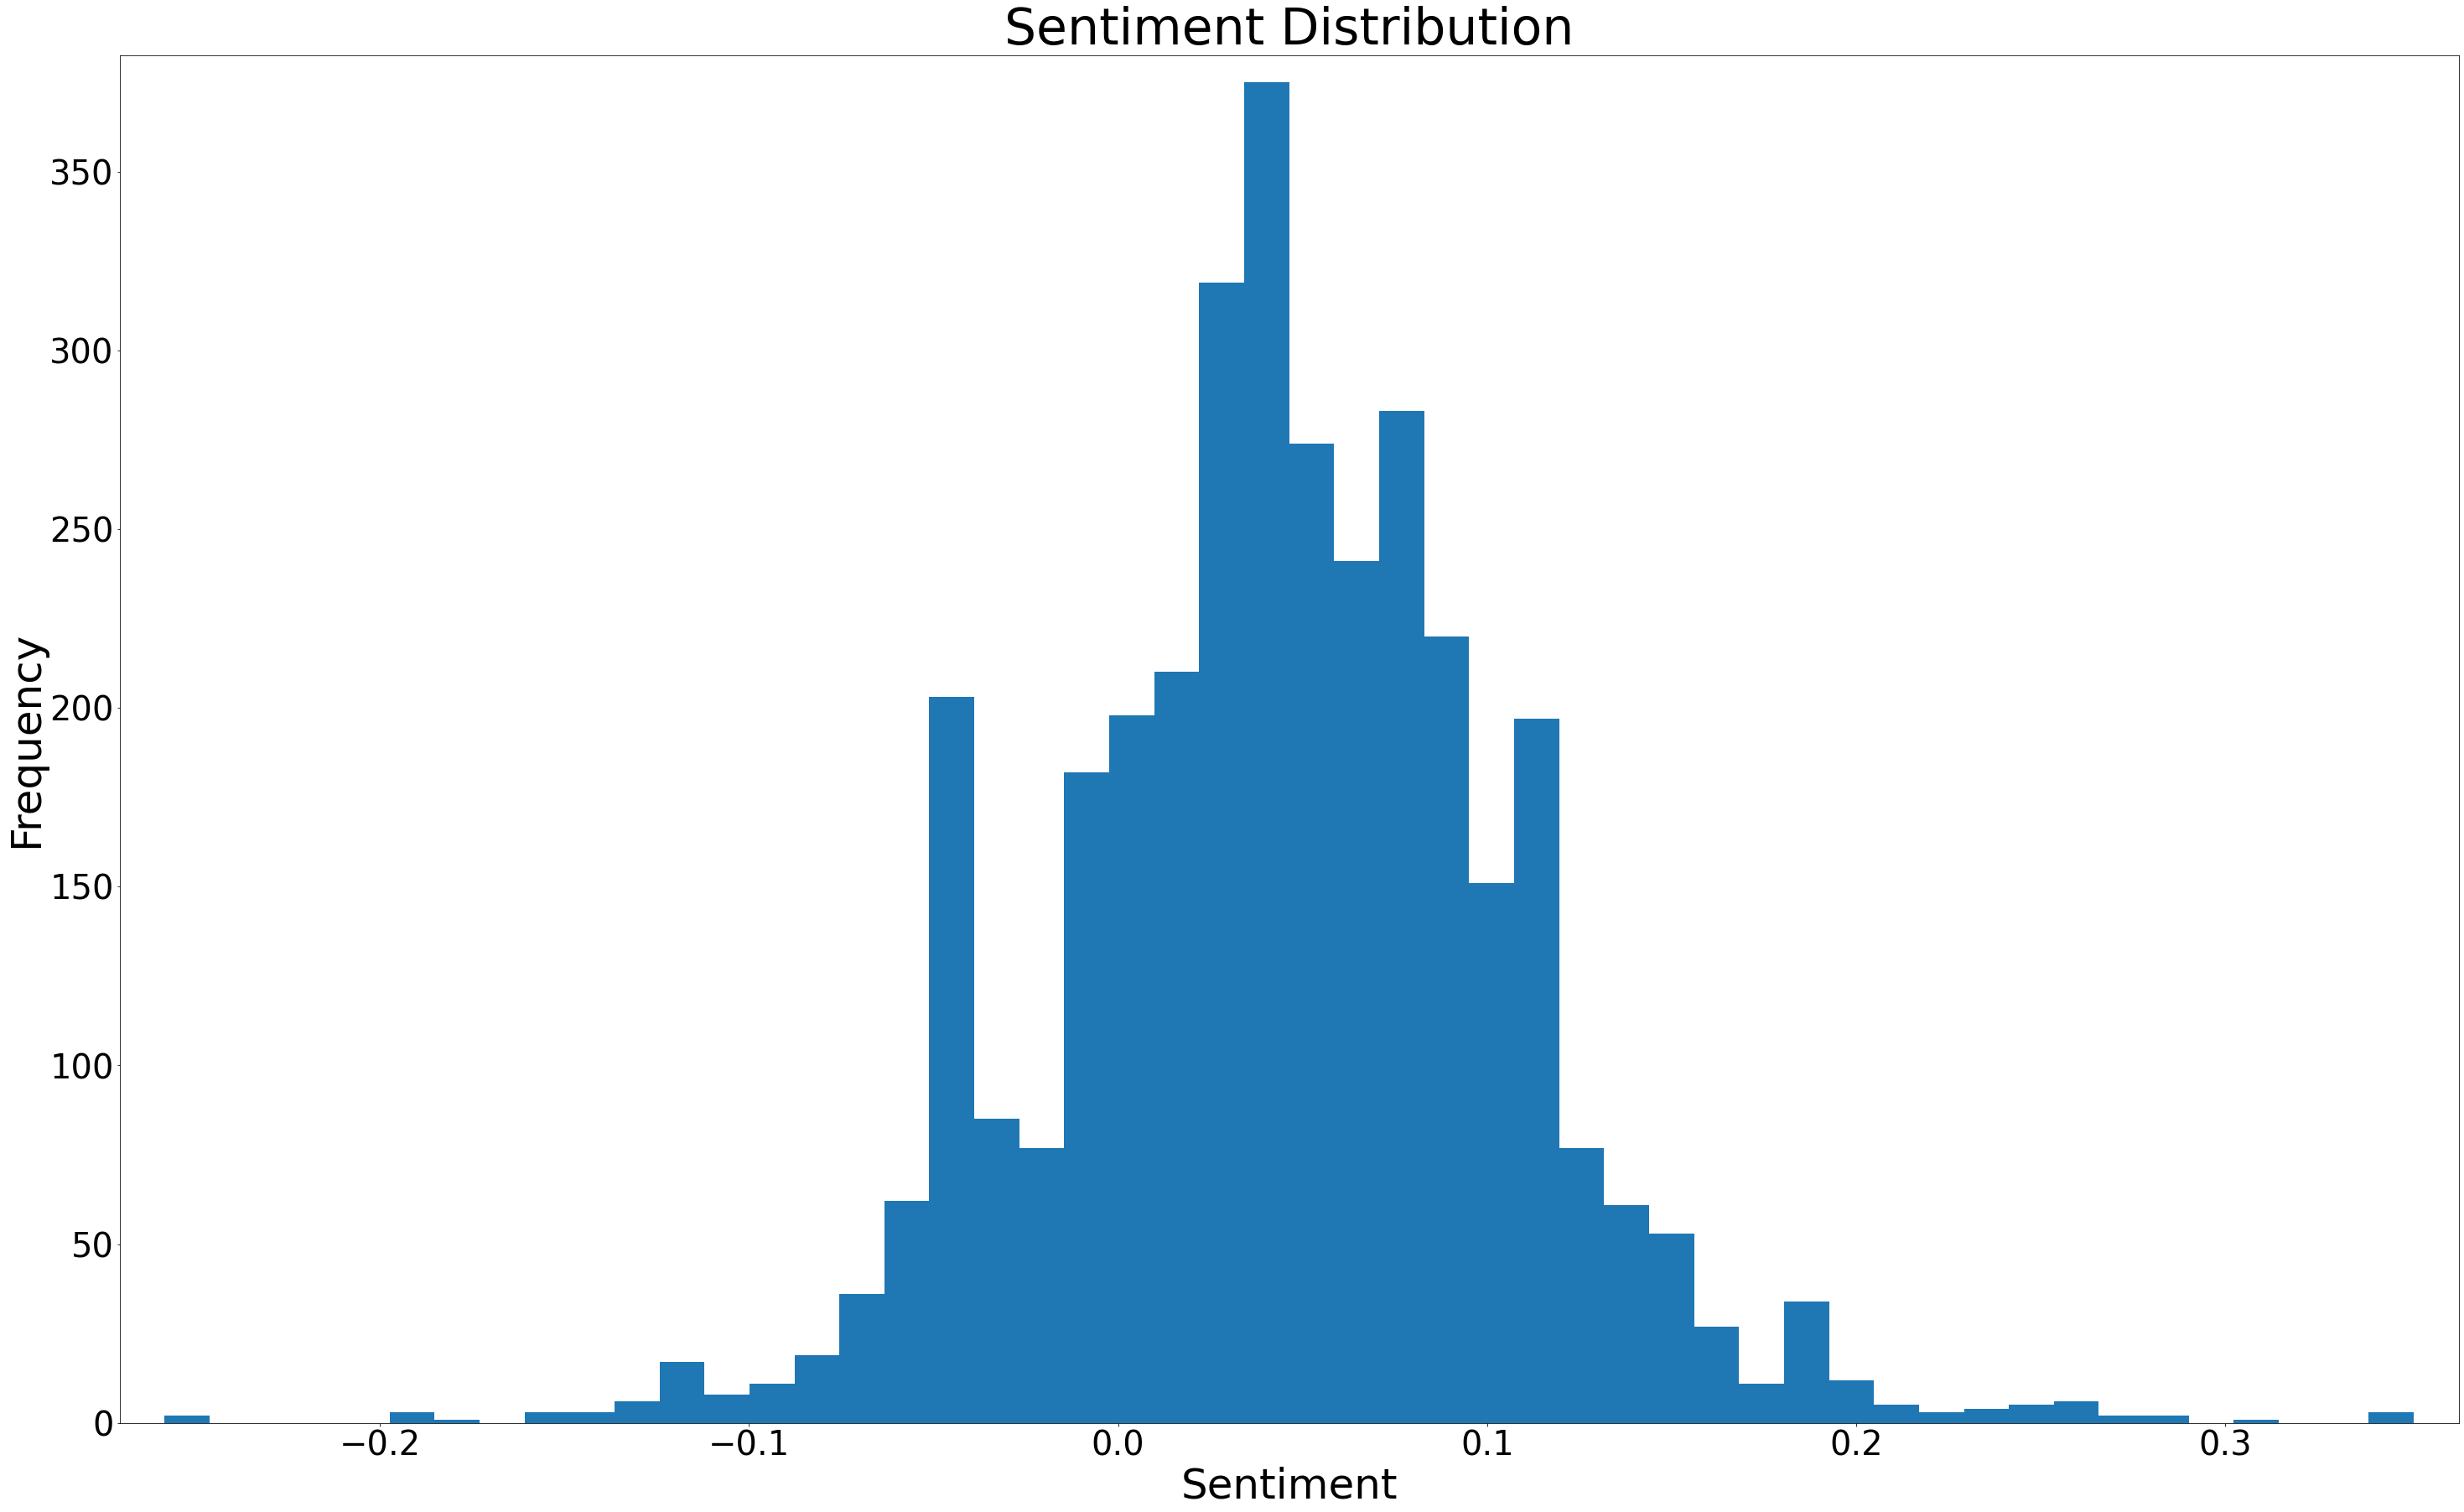

In [20]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

/home/ekostrov/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'center'), Text(1, 0, 'right'), Text(2, 0, 'left')])

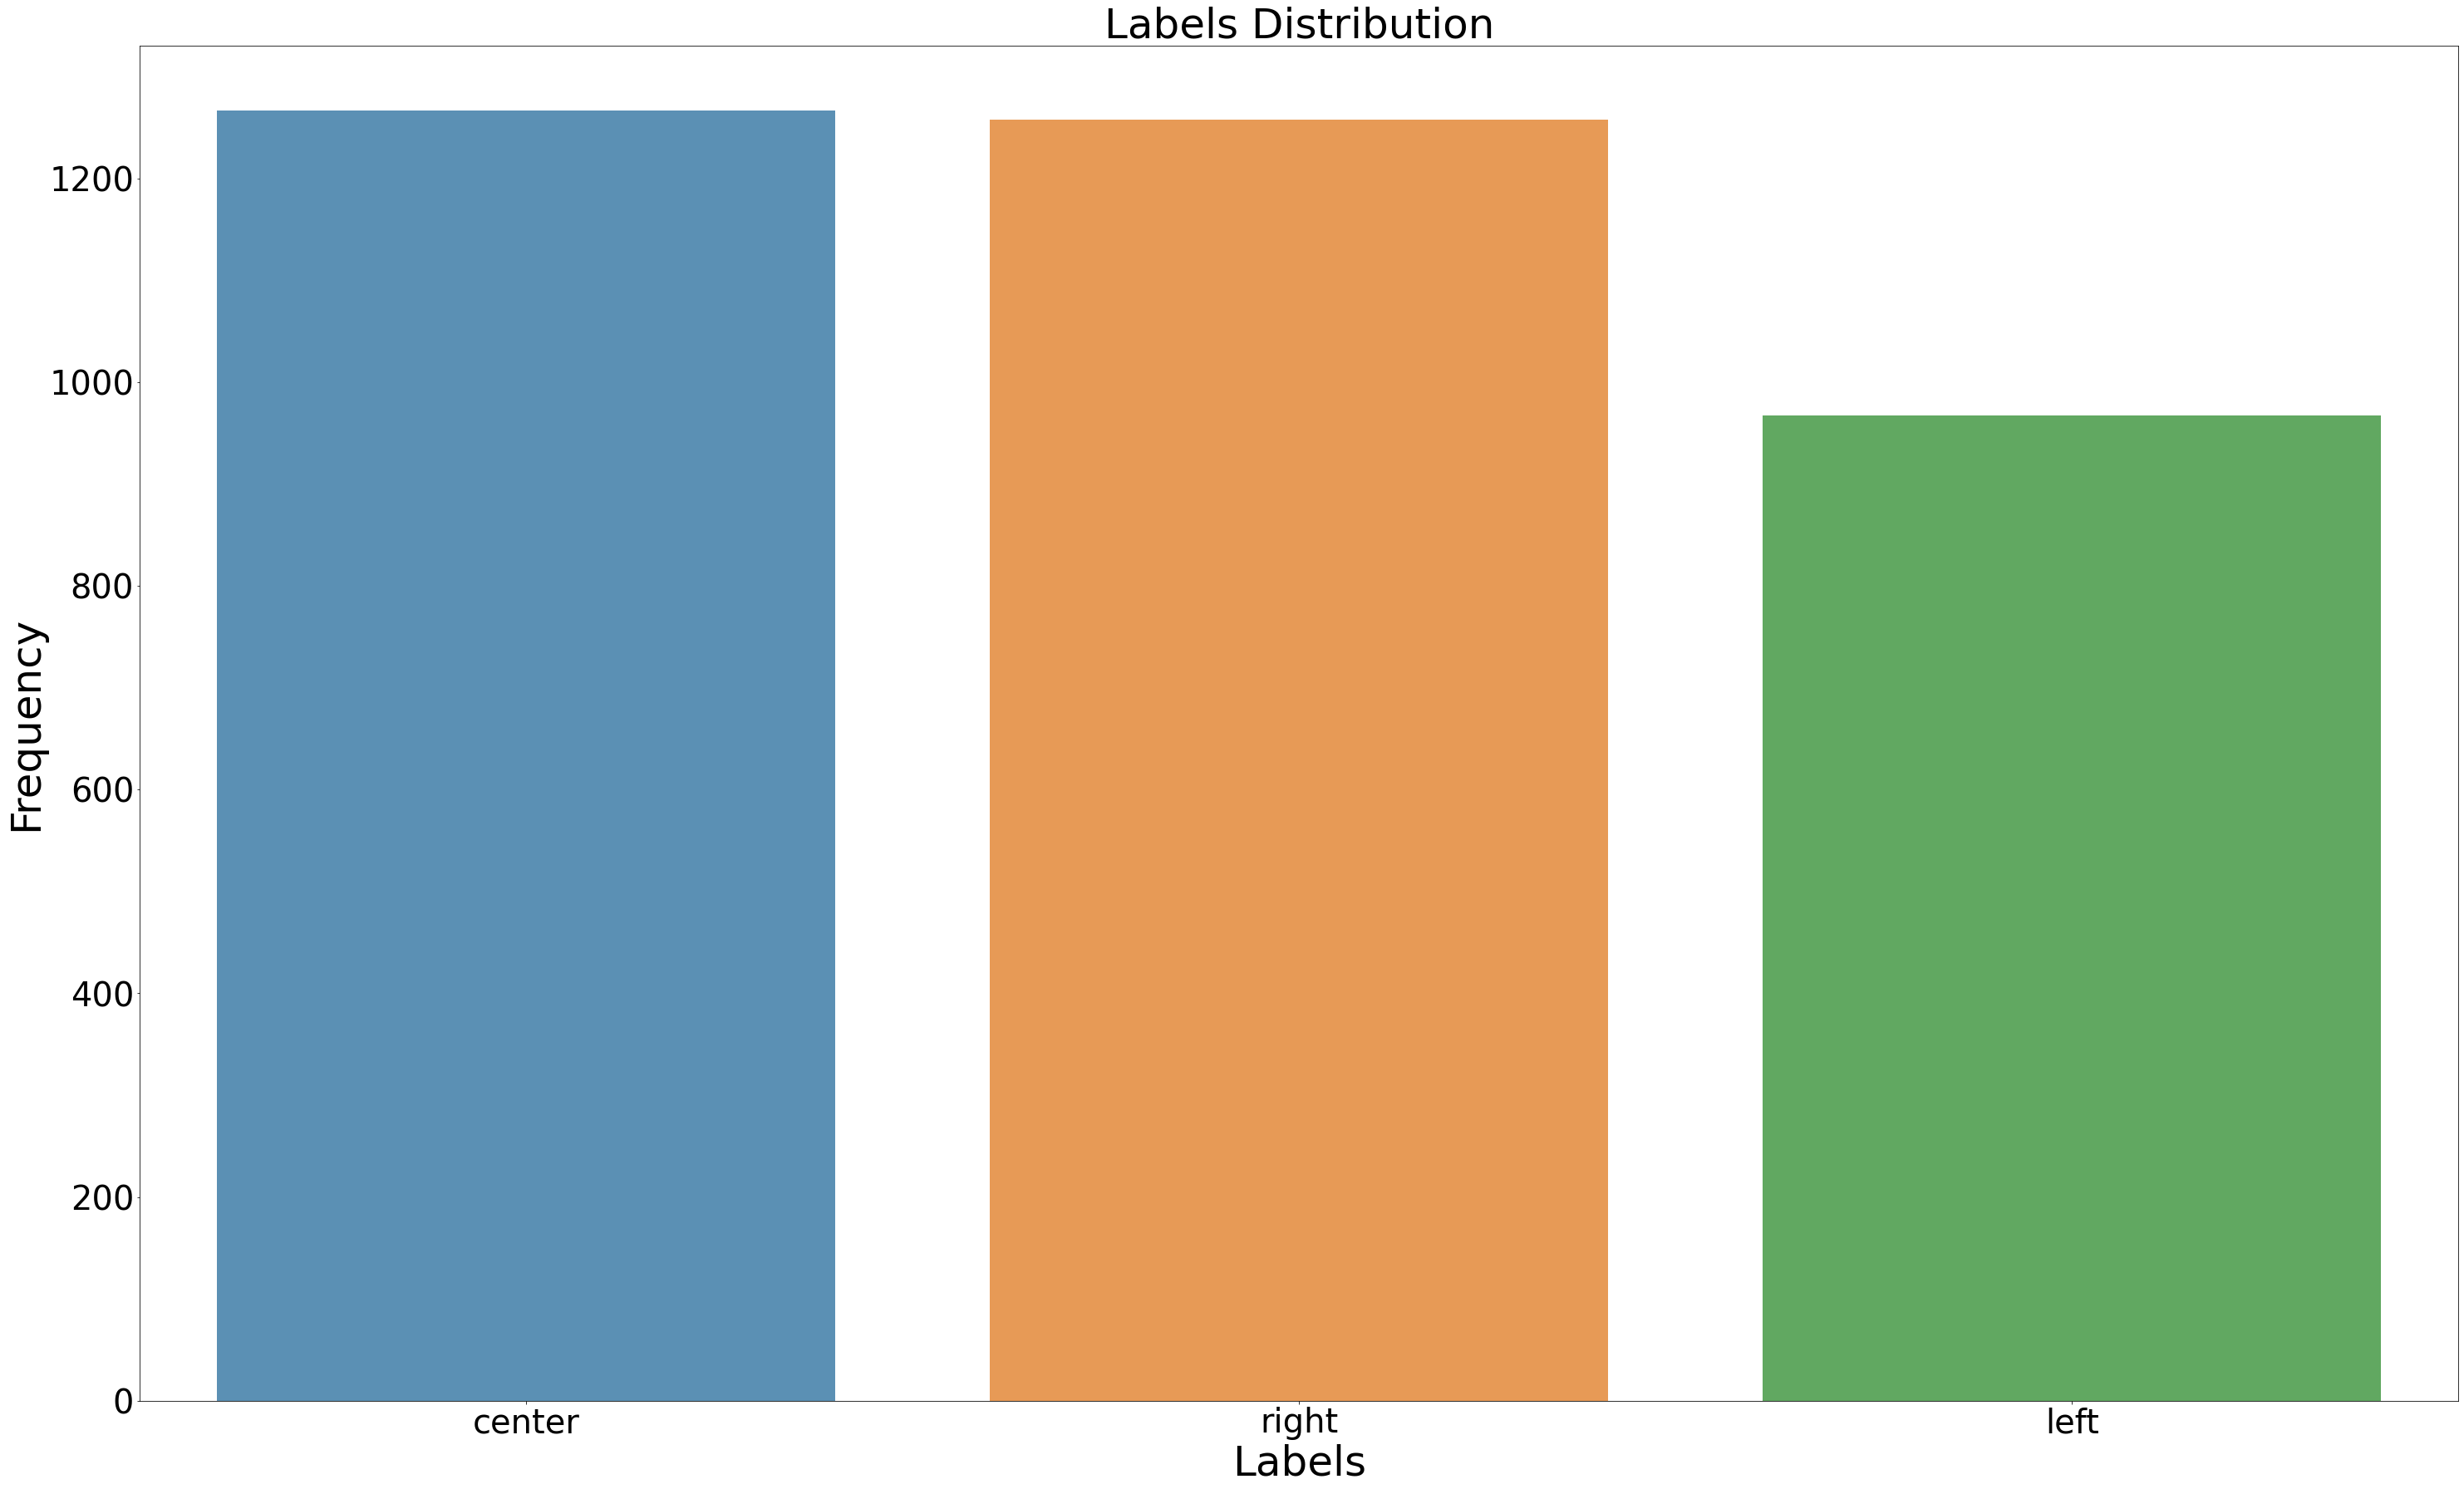

In [12]:
x_label = df.label.value_counts()
y_label = x_label.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_label.index, x_label.values, alpha=0.8)
plt.title("Labels Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Labels', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Labels'}, ylabel='label'>

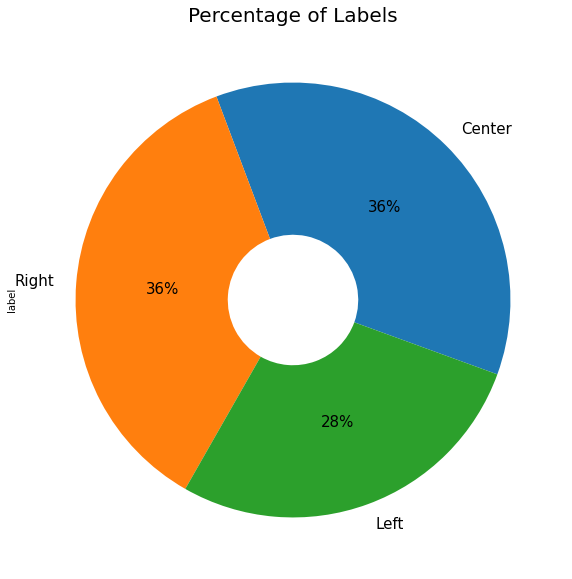

In [13]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.label.value_counts().plot(kind='pie', labels=['Center', 'Right', 'Left'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [14]:
polarity_avg = df.groupby('label')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Label', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

KeyError: 'Column not found: sentiment'

In [24]:
df.head()

,label,lemmatized,sentiment
0,right,president yet clarify victory pandemic look like president joe biden begin coronavirus speech th...,0.104244
1,right,hear president joe biden tell american evacuation afghanistan parallel d-day invasion execution ...,0.093561
2,right,mainstream medium s honeymoon president joe biden yet medium coverage twin crisis face biden adm...,-0.015079
3,right,squad make demand military solution well part decade washington free beacon chronicle trial tr...,0.045434
4,right,restraint crowd delivers america s humiliation afghanistan quincy institute responsible statecra...,0.051024


In [5]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

KeyError: 'lemmatized'

/home/ekostrov/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
df.head()

,label,lemmatized,sentiment,word_count
0,right,president yet clarify victory pandemic look like president joe biden begin coronavirus speech th...,0.104244,329
1,right,hear president joe biden tell american evacuation afghanistan parallel d-day invasion execution ...,0.093561,160
2,right,mainstream medium s honeymoon president joe biden yet medium coverage twin crisis face biden adm...,-0.015079,180
3,right,squad make demand military solution well part decade washington free beacon chronicle trial tr...,0.045434,290
4,right,restraint crowd delivers america s humiliation afghanistan quincy institute responsible statecra...,0.051024,281


In [1]:
letter_avg = df.groupby('label')['lemmatized'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Label', fontsize=35)
plt.ylabel('Count of Letters in Label', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Label Distribution', fontsize=40)


NameError: name 'df' is not defined

/home/ekostrov/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-2e8049a5eda8>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

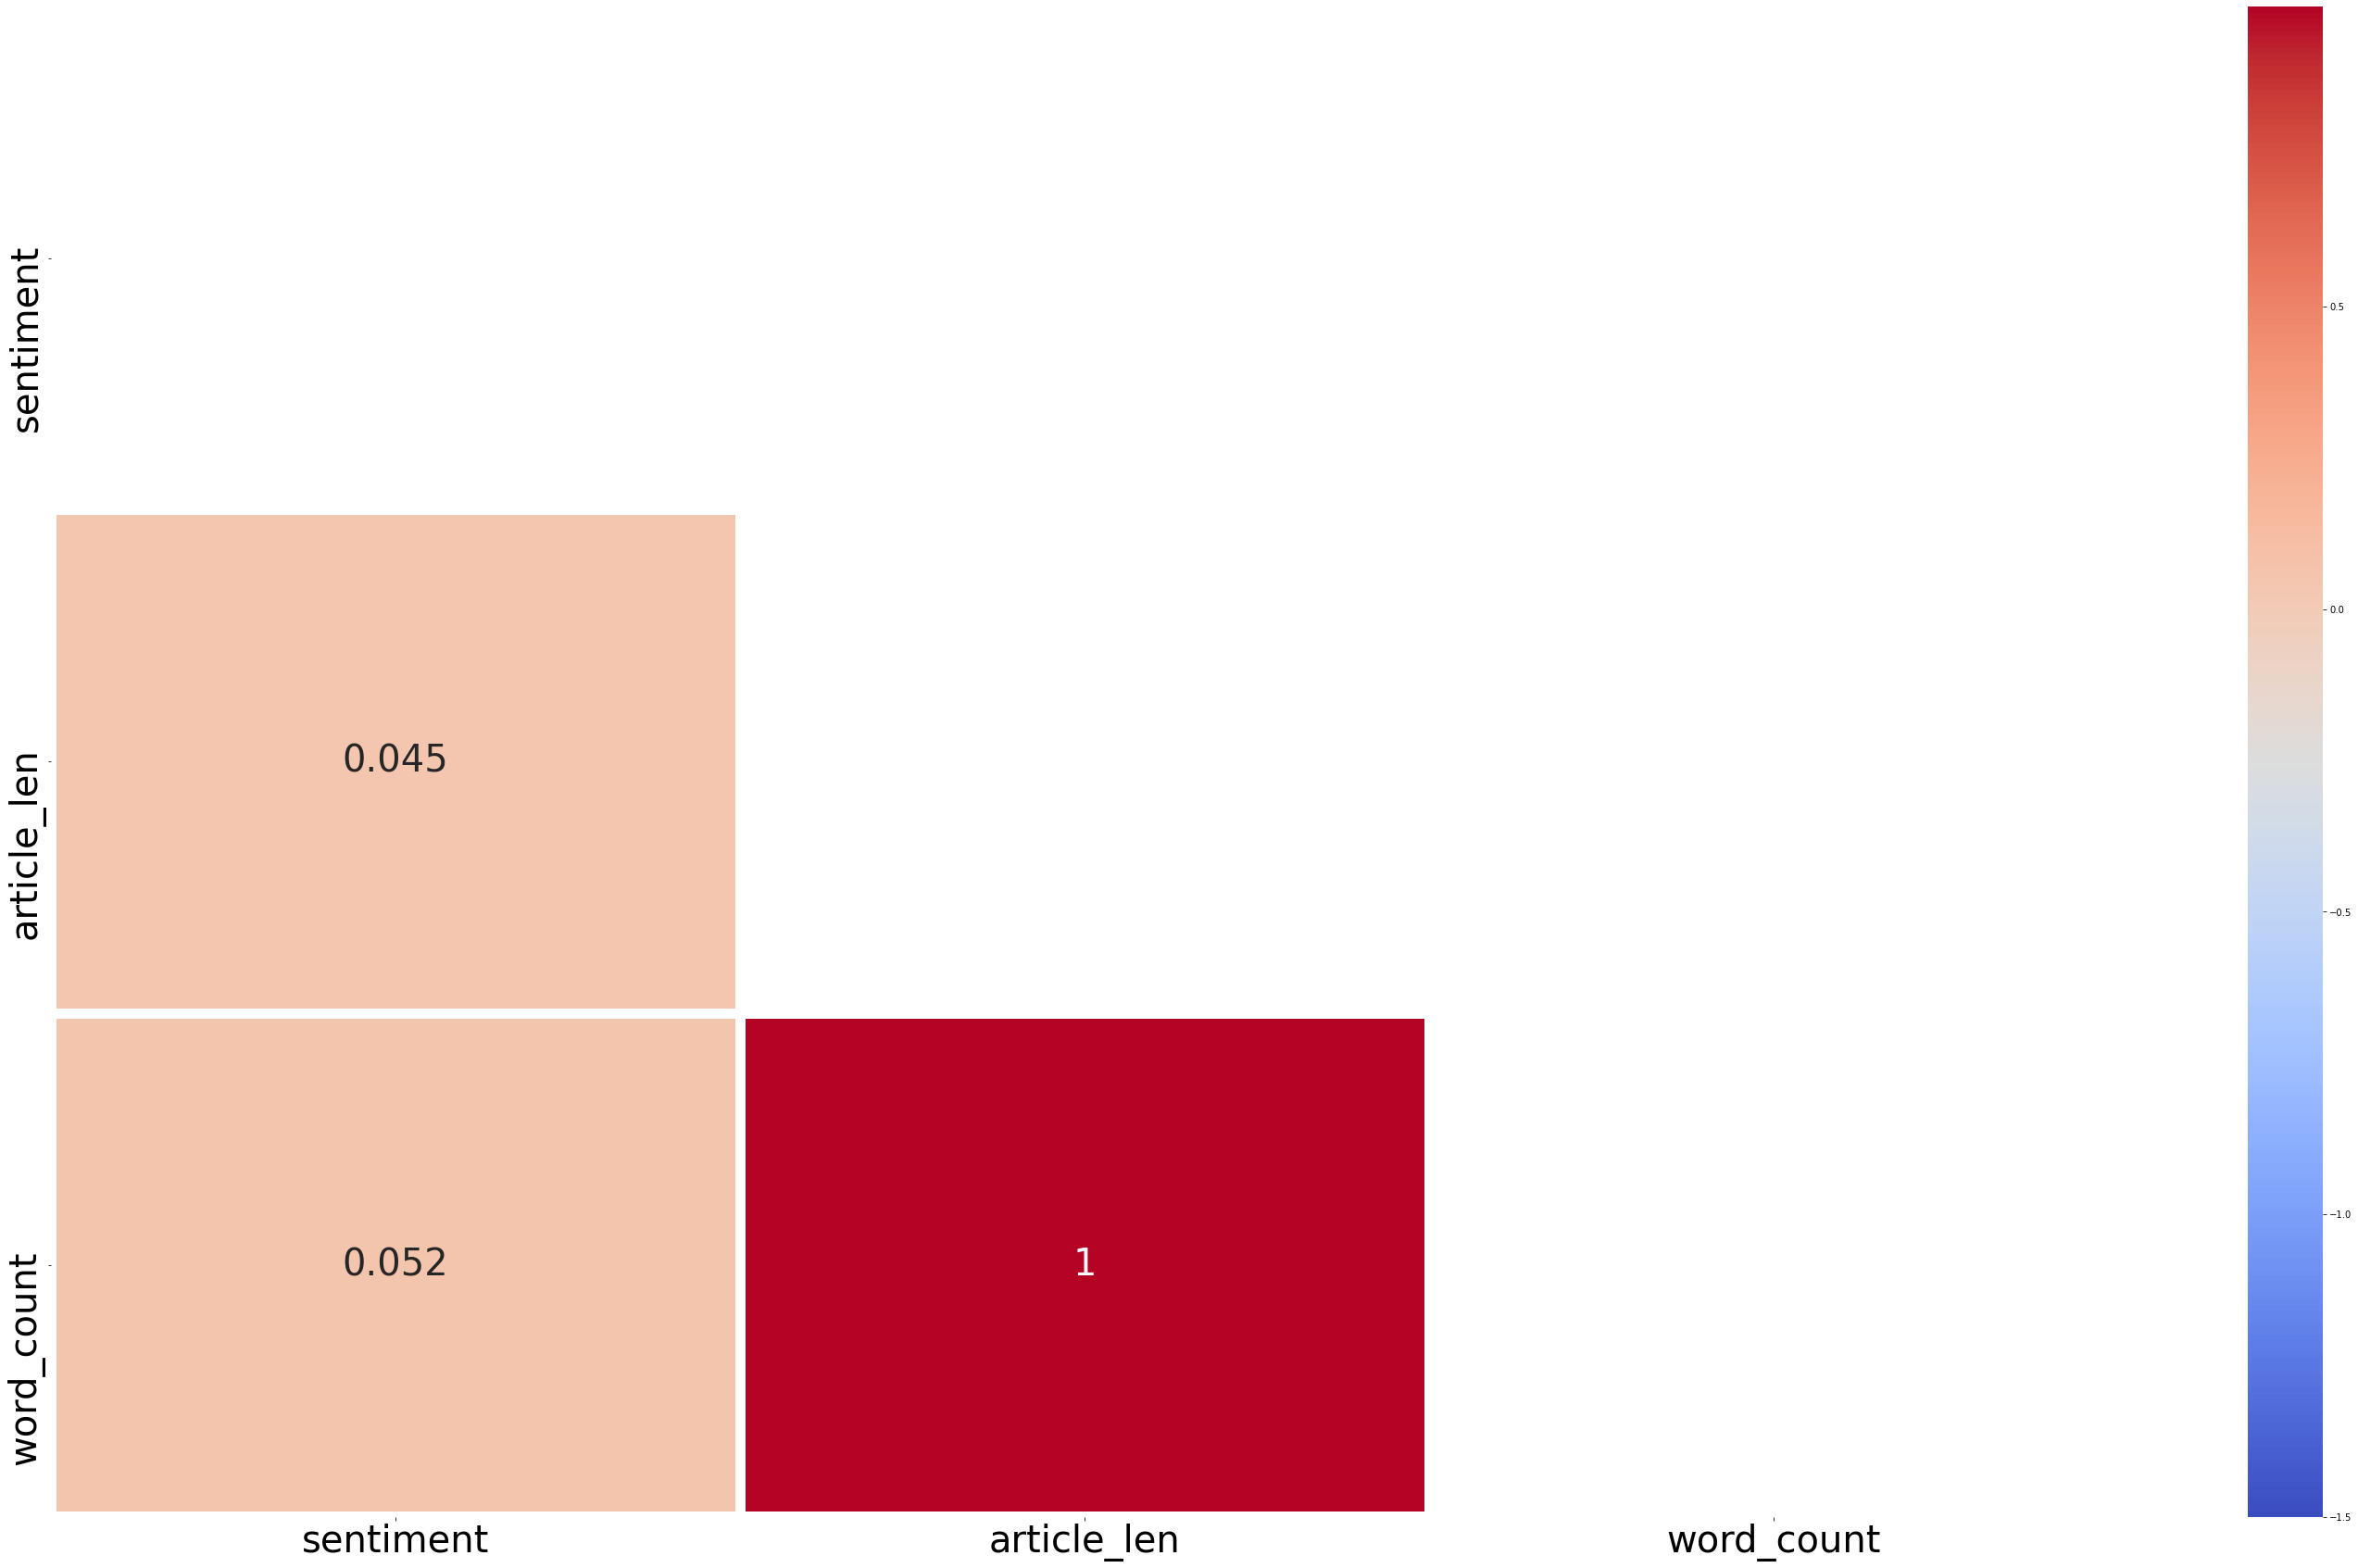

In [41]:
correlation = df[['label','sentiment', 'article_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [ ]:
words = df['lemmalized']
allwords = []
for wordlist in words:
    allwords += wordlist

print(allwords)